In [13]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
dir_path = "/content/drive/MyDrive/AI Inspirit/COVID DATASETS"
df = pd.read_csv(dir_path + '/merged_dataset1.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import torch
import torch.nn as nn

In [ ]:
df.shape


In [15]:
sample_df = df.sample(n=1_000_000, replace=False)
#sample_df = df

In [ ]:
sample_df.shape

(1000000, 35)

In [ ]:
sample_df.head()

,CBC/CRP,Diabetes,Asthma,Heart disease,kidney disease,Respiratory disease,Cancer,Corticosteroids,HEM,Immunodeficiency,...,Eczema,Vertigo,Nausea/Diarrhea,Death,AGE,SEX,PNEUMONIA,COPD,HIPERTENSION,OBESITY
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,41.77565,0.500741,0.135621,0.014406,0.155651,0.152855
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,41.77565,0.500741,0.135621,0.014406,0.155651,0.152855
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,41.77565,0.500741,0.135621,0.014406,0.155651,0.152855
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,41.77565,0.500741,0.135621,0.014406,0.155651,0.152855
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,41.77565,0.500741,0.135621,0.014406,0.155651,0.152855


https://www.geeksforgeeks.org/data-normalization-with-pandas/

for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    

to use min-max normalization:

normalized_df=(df-df.min())/(df.max()-df.min())

Edit: To address some concerns, need to say that Pandas automatically applies colomn-wise function in the code above.

In [16]:
# (min-max) normalizing data
for column in sample_df.columns:
    sample_df[column] = (sample_df[column] - sample_df[column].min()) / (sample_df[column].max() - sample_df[column].min())    


In [ ]:
sample_df.head()

,CBC/CRP,Diabetes,Asthma,Heart disease,kidney disease,Respiratory disease,Cancer,Corticosteroids,HEM,Immunodeficiency,...,Eczema,Vertigo,Nausea/Diarrhea,Death,AGE,SEX,PNEUMONIA,COPD,HIPERTENSION,OBESITY
848043,0.470219,0.0,0.0,0.0,0.0,0.087774,0.034483,0.003135,0.015674,0.0,...,0.009404,0.034483,0.037618,0.0,0.413223,0.0,0.0,0.0,1.0,0.0
57497,0.470219,0.0,0.0,0.0,0.0,0.087774,0.034483,0.003135,0.015674,0.0,...,0.009404,0.034483,0.037618,1.0,0.561983,0.0,1.0,0.0,0.0,0.0
1035329,0.470219,0.0,0.0,0.0,0.0,0.087774,0.034483,0.003135,0.015674,0.0,...,0.009404,0.034483,0.037618,0.0,0.272727,1.0,0.0,0.0,0.0,0.0
804675,0.470219,0.0,0.0,0.0,0.0,0.087774,0.034483,0.003135,0.015674,0.0,...,0.009404,0.034483,0.037618,0.0,0.239669,0.0,0.0,0.0,0.0,0.0
374326,0.470219,1.0,0.0,0.0,0.0,0.087774,0.034483,0.003135,0.015674,0.0,...,0.009404,0.034483,0.037618,0.0,0.314050,1.0,1.0,0.0,0.0,0.0


In [17]:
from sklearn.model_selection import train_test_split
#determining train and test split
train_df, test_df = train_test_split(sample_df, test_size = 0.2, random_state = 1) #0.2 means 20% will be the test size

In [18]:
from imblearn.over_sampling import SMOTE
#with smote
smote = SMOTE(sampling_strategy='minority')
X = train_df.drop("Death", axis=1)
y = train_df["Death"]
X_resampled, y_resampled = smote.fit_resample(X, y)
assert X_resampled.shape[0] > X.shape[0]
#without smote
#X = train_df.drop("Death", axis=1)
#y = train_df['Death']

In [19]:
X_test = test_df.drop("Death", axis=1)
y_test = test_df['Death']

In [166]:
#I don't think it's possible to use n_estimators with xgb.DMatrix
import xgboost as xgb

#dtrain = xgb.DMatrix(X, label=y)
dtest = xgb.DMatrix(X_test, label=y_test)

dtrain = xgb.DMatrix(X_resampled, label=y_resampled)


params = {
    'max_depth': 4,  # Maximum depth of a tree
    'eta': 0.025,  # Learning rate
    'objective': 'binary:logistic',  # Loss function
    #'num_class': 2  # Number of classes in your problem
    
}

num_round = 50

Boost = xgb.train(params, dtrain, num_round)
y_preds = Boost.predict(dtest)

In [167]:
y_preds.shape

(200000,)

In [168]:
print(y_preds)

[0.18014243 0.18014243 0.18014243 ... 0.31195736 0.30963942 0.18014243]


In [169]:
#only run with an objective: binary:logistic
#objective binary:logisitic only return the probability of one class in one column, i want the probabilities of both classes to compare.
#i am now subtracting to find the probability of the 2nd class and adding it to a list
#the two lists of probabilities will be stacked respectively on axis = 1
#so that in column 0, there are negative(0) probabilities. and in column 1, there are positive(1) probabilities
#therefore my new array has many rows (with the 2 class predictions of one sample) with 2 columns (of negative and positive class predictions respectively). 
second_class_prob = []
count = 0
for l in y_preds:
  count = count + 1
  g = 1 - l
  second_class_prob.append(g)

second_class_prob = np.array(second_class_prob)
y_preds = np.stack((second_class_prob, y_preds), axis=1)
#print(y_preds)
#second_class_prob.shape

In [ ]:
#or knowing that binary:logistic was giving me a 1D array of positive probabilities
#without needing argmax
#I could have done
#for l in y_pred:
#   if l >= 0.5:
        #y_pred_class.append(1)
    #else:
        #y_pred_class.append(0)

In [170]:
#The argmax function returns the index (column number) of the maximum value in each row of y_preds.
# Since each row represents the predicted probabilities for a single sample,
# the index of the maximum value corresponds to the predicted class label for that sample.
#if row 1 has a higher negative value(probability), then index/column/class 0 or will be returned.. and so on in a list
#if row 2 has a higher positive value(probability), then index/column/class 1 or will be returned.. and so on in a list
y_pred_class = y_preds.argmax(axis=1)

In [171]:
print(y_pred_class)

[0 0 0 ... 0 0 0]


In [172]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_class) #y_pred_class or y_preds
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.51%


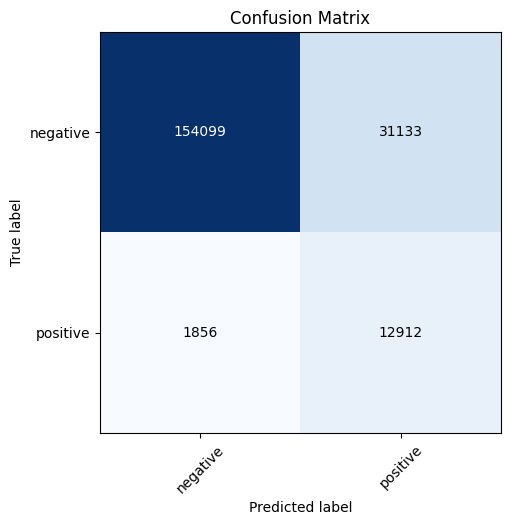

In [173]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
#using y_test values and the predictions made from X_test
cm = confusion_matrix(y_test, y_pred_class)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm, cmap=plt.cm.Blues)

class_names = ['negative', 'positive']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=37)
#rf.fit(X, y)
rf.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=37)

In [22]:
y_pred = rf.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 85.41%


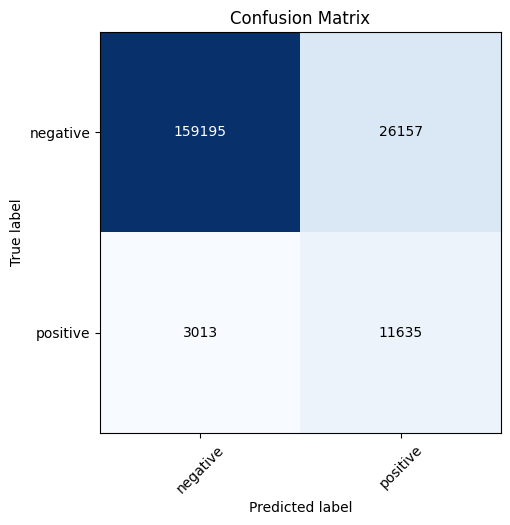

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
#using y_test values and the predictions made from X_test
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm, cmap=plt.cm.Blues)

class_names = ['negative', 'positive']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
  def __init__(self, x, y):
    self.x_train = torch.tensor(x, dtype=torch.float)
    self.y_train = torch.tensor(y, dtype=torch.float)
    pass

  def __len__(self):
    return len(self.y_train)

  def __getitem__(self, idx):
    return self.x_train[idx], self.y_train[idx]

In [ ]:
from torch.utils.data import DataLoader
train_Dataset = MyDataset(X_resampled.values, y_resampled.values)
#train_Dataset = MyDataset(X_resampled.values, y_resampled.values)

BATCH_SIZE = 512 #you usually want you batch size to be a power of 2
train_loader = DataLoader(train_Dataset, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
for i, (data, labels) in enumerate(train_loader):
  print(data.shape, labels.shape) #data is inputs, labels is outputs
  #print(data,labels)
  break

torch.Size([512, 34]) torch.Size([512])


In [ ]:
a = torch.tensor([100])
a = a.unsqueeze(dim = 0)
print(a)
print(a.shape)

tensor([[100]])
torch.Size([1, 1])


In [ ]:
print(len(X.columns))

34


In [ ]:
import torch
import torch.nn as nn

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #layers
        self.fc1 = nn.Linear(34, 1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512,256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 32)
        self.fc7 = nn.Linear(32, 1)
      

        self.dropout = nn.Dropout(0.2) #dropout is only used during training not evaluation
        #Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped out” randomly. Therefore neurons that are left get 'stronger' to compensate for the 'dropped out' neurons.

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x) #self.training only applied to training not evaluation
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = torch.relu(self.fc4(x))
        x = self.dropout(x)
        x = torch.relu(self.fc5(x))
        x = self.dropout(x)
        x = torch.relu(self.fc6(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc7(x))
        
        return x

In [ ]:
# create an instance of the neural network model
model = Net()

# define the loss function and optimizer
loss_fn = nn.BCELoss()
LR = 1e-4  #1e-4 = 1 x 10^(-4) #1.5e-4 #3e-4 #2.5e-3 #1e-3
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)

In [ ]:
losses = []
#plot losses at the end

In [ ]:

# train the model
EPOCHS = 30
model.train() #lets the model know that its training and so be using dropouts
for epoch in range(EPOCHS):
  print(epoch)
  epoch_loss = 0
  num_examples = 0
  for x, y in train_loader:
    ## FORWARD PASS
    
    model_output = model(x)
    model_output = model_output.squeeze(1)  #output: BATCH_SIZE x 1 – squeeze → output: BATCH_SIZE-> [512]
    loss = loss_fn(model_output, y)
    losses.append(loss.item())

    ## BACKPROPAGATION
    optimizer.zero_grad() ## zeroes out gradients that will be accumulated
    loss.backward()

    ## UPDATE ALL PARAMETERS
    optimizer.step()

    num_examples = num_examples + 1
    
    if num_examples % 500 == 0:
      print(loss.item())

0
0.3071027994155884
0.38239148259162903
0.3411381244659424
0.38287249207496643
0.40729421377182007
1
0.3816244900226593
0.36736446619033813
0.36253395676612854
0.3470991849899292
0.3497450053691864
2
0.34375452995300293
0.37241071462631226
0.3459709882736206
0.36172929406166077
0.37762558460235596
3
0.3525920808315277
0.3270283639431
0.37689682841300964
0.32156020402908325
0.3887483775615692
4
0.35865533351898193
0.3661801815032959
0.3802453875541687
0.3462072014808655
0.37168529629707336
5
0.37024179100990295
0.35031116008758545
0.36586031317710876
0.3518412411212921
0.3430057168006897
6
0.39215385913848877
0.3263970613479614
0.3399542570114136
0.3184250593185425
0.3655819594860077
7
0.3336430490016937
0.3762485980987549
0.3885621428489685
0.36239176988601685
0.3833397924900055
8
0.37562093138694763
0.34310612082481384
0.35675445199012756
0.3540511727333069
0.3404938578605652
9
0.32732972502708435
0.38687485456466675
0.35753846168518066
0.31385892629623413
0.31753605604171753
10
0.33

In [ ]:
import os
model_path = "/content/drive/MyDrive/AI Inspirit/MODELS"
print("data_path:", model_path)
files = os.listdir(model_path)  # Get all the files in that directory
print(f"Files in current directory '{model_path}': {files}")

data_path: /content/drive/MyDrive/AI Inspirit/MODELS
Files in current directory '/content/drive/MyDrive/AI Inspirit/MODELS': ['Baseline-1-30-(800000, 34).pth', 'Baseline-2-5-(800000, 34).pth', 'Baseline-3-5-(800000, 34).pth', 'Baseline-4-5-(800000, 34).pth', 'Baseline-5-5-(839115, 34).pth', 'Baseline-6-5-(800000, 34).pth', 'Baseline-7-5-(800000, 34).pth', 'Baseline-8-6-(800000, 34)-D2.pth', 'Baseline-9-9-(800000, 34)-D2-LR0.0025.pth', 'Baseline-10-9-(800000, 34)-D2-LR0.001.pth', 'Baseline-11-6-(800000, 34)-D2-LR0.001.pth', 'Baseline-12-6-(800000, 34)-D2-LR0.0001.pth', 'Baseline-13-15-(800000, 34)-D2-LR0.001.pth', 'Baseline-14-9-(800000, 34)-D2-LR0.001.pth', 'Baseline-15-9-(800000, 34)-D2-LR0.0001.pth', 'Baseline-16-6-(800000, 34)-D2-LR0.001.pth', 'Baseline-17-20-(800000, 34)-D2-LR0.001.pth', 'Baseline-18-5-(800000, 34)-D2-LR0.0003.pth', 'Baseline-19-30-(800000, 34)-D2-LR0.0001.pth']


In [ ]:
#saving model
d = 2 # 2 means 0.2 rate
version = 19
model_name = f"Baseline-{version}-{EPOCHS}-{X.shape}-D{d}-LR{LR}.pth"

PATH = model_path + "/" + model_name

torch.save(model.state_dict(), PATH)
print(f"Saved model: {model_name}")

Saved model: Baseline-19-30-(800000, 34)-D2-LR0.0001.pth


In [ ]:
#loading model
import torch
import torch.nn as nn
model_path = "/content/drive/MyDrive/AI Inspirit/MODELS"
model_name = f"Baseline-{version}-{EPOCHS}-{X.shape}-D{d}-LR{LR}.pth"
PATH = model_path + "/" + model_name
model = Net()
model.load_state_dict(torch.load(PATH)) #loading named model from drive
model.eval() #lets model know that its evaluating and so turns off dropout

KeyboardInterrupt: ignored

In [ ]:

from torch.utils.data import DataLoader
test_Dataset = MyDataset(X_test.values, y_test.values)

BATCH_SIZE = 64 #you usually want you batch size to be a power of 2 #changes depending on size of dataset
test_loader = DataLoader(test_Dataset, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
Y_TEST = []
Y_PRED = []

In [ ]:
total_test_loss = 0.0
test_correct = 0.0

with torch.set_grad_enabled(False):
  for x, y in test_loader:
    data, target = x, y
    
    y_pred = model(data)
    y_pred = y_pred.squeeze(dim=1)
    loss = loss_fn(y_pred, target)
    #print('y_pred before:', y_pred)
    y_pred = torch.tensor(np.where(y_pred < 0.5, 0, 1), dtype = torch.float)

    Y_TEST.append(target)
    Y_PRED.append(y_pred)
    
    #print('target:', target)
    #print('y_pred:', y_pred)
    
    total_test_loss += loss
    test_correct += torch.eq(y_pred, target).sum().item()
    #print('test correct:',test_correct)
    #break




In [ ]:
#converts list of tensors into one big tensor
pred_stack = torch.stack(Y_PRED, dim = 0)
target_stack = torch.stack(Y_TEST, dim = 0)
#converting tensors to pandas dataframes
pred_df = pd.DataFrame(pred_stack.numpy())
pred_df = pred_df.stack().reset_index(drop = True)
target_df = pd.DataFrame(target_stack.numpy())
target_df = target_df.stack().reset_index(drop = True)

In [ ]:
import pandas as pd

In [ ]:
print("number test correct:", test_correct)
print("total test size:", len(test_loader.dataset))

number test correct: 169939.0
total test size: 200000


In [ ]:
pred_df.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float32

In [ ]:
target_df.head()

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
dtype: float32

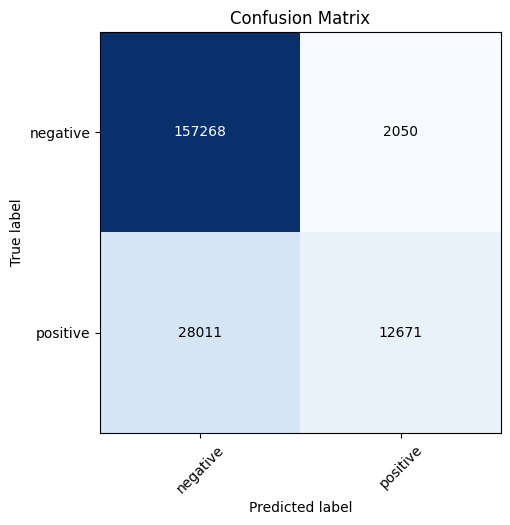

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
#using y_test values and the predictions made from X_test
cm = confusion_matrix(pred_df, target_df)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm, cmap=plt.cm.Blues)

class_names = ['negative', 'positive']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

plt.show()